In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from format_io import h5_to_df

from akita_utils.seq_gens import split_concat_to_integers, split_concat_to_strings

2023-01-17 11:33:40.270291: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2023-01-17 11:33:40.270325: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def average_over_targets(dataframe, stat, mouse=True, model=1):
    
    num_targets = 6
    if not mouse:
        num_targets = 5
    
    collist = [stat + f"_h{int(mouse)}_m{model}_t{i}" for i in range(num_targets)]
    
    dataframe[f"{stat}_average"] = dataframe[collist].mean(axis=1)
    
    return dataframe

In [4]:
path = "./100VS100medium_percentile80/scd.h5"
scd_stats=["SCD"]

In [5]:
df = h5_to_df(path, scd_stats, drop_duplicates_key=None)

In [6]:
df = average_over_targets(df, "SCD")

In [7]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average
0,63.93750,69.18750,66.37500,62.00000,67.68750,57.18750,1,"chr17,chr17","73302318,73302318",25,"11.921875,11.921875",>>,65,"73302299,73302299","+,+",64.43750
1,54.87500,57.96875,55.65625,52.71875,57.50000,50.25000,1,"chr17,chr2","73302318,4652218",25,"11.921875,11.890625",>>,65,"73302299,4652199","+,-",54.84375
2,45.28125,41.00000,45.43750,45.03125,46.18750,43.43750,1,"chr17,chr18","73302318,75757719",25,"11.921875,11.8671875",>>,65,"73302299,75757700","+,+",44.40625
3,40.56250,32.56250,45.06250,45.87500,43.71875,42.18750,1,"chr17,chr18","73302318,64506771",25,"11.921875,11.765625",>>,65,"73302299,64506752","+,-",41.65625
4,69.75000,76.56250,76.56250,71.31250,76.18750,63.31250,1,"chr17,chr11","73302318,31942449",25,"11.921875,11.75",>>,65,"73302299,31942430","+,+",72.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,48.71875,47.78125,58.93750,61.12500,56.87500,50.37500,3,"chr1,chr11","179847901,34229190",25,"9.6484375,9.828125",>>,65,"179847882,34229171","+,+",54.00000
29996,45.90625,40.40625,58.93750,62.53125,54.87500,49.37500,3,"chr1,chr6","179847901,137747756",25,"9.6484375,9.78125",>>,65,"179847882,137747737","+,-",52.00000
29997,45.50000,40.09375,58.78125,62.43750,54.65625,49.25000,3,"chr1,chr19","179847901,26193888",25,"9.6484375,9.703125",>>,65,"179847882,26193869","+,-",51.78125
29998,48.18750,46.87500,58.75000,61.12500,56.50000,50.18750,3,"chr1,chr1","179847901,134638716",25,"9.6484375,9.6875",>>,65,"179847882,134638697","+,+",53.62500


In [8]:
df["core_start"] = df["start"].apply(lambda x: x.split(",")[0])
df["flank_start"] = df["start"].apply(lambda x: x.split(",")[1])

In [9]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average,core_start,flank_start
0,63.93750,69.18750,66.37500,62.00000,67.68750,57.18750,1,"chr17,chr17","73302318,73302318",25,"11.921875,11.921875",>>,65,"73302299,73302299","+,+",64.43750,73302299,73302299
1,54.87500,57.96875,55.65625,52.71875,57.50000,50.25000,1,"chr17,chr2","73302318,4652218",25,"11.921875,11.890625",>>,65,"73302299,4652199","+,-",54.84375,73302299,4652199
2,45.28125,41.00000,45.43750,45.03125,46.18750,43.43750,1,"chr17,chr18","73302318,75757719",25,"11.921875,11.8671875",>>,65,"73302299,75757700","+,+",44.40625,73302299,75757700
3,40.56250,32.56250,45.06250,45.87500,43.71875,42.18750,1,"chr17,chr18","73302318,64506771",25,"11.921875,11.765625",>>,65,"73302299,64506752","+,-",41.65625,73302299,64506752
4,69.75000,76.56250,76.56250,71.31250,76.18750,63.31250,1,"chr17,chr11","73302318,31942449",25,"11.921875,11.75",>>,65,"73302299,31942430","+,+",72.25000,73302299,31942430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,48.71875,47.78125,58.93750,61.12500,56.87500,50.37500,3,"chr1,chr11","179847901,34229190",25,"9.6484375,9.828125",>>,65,"179847882,34229171","+,+",54.00000,179847882,34229171
29996,45.90625,40.40625,58.93750,62.53125,54.87500,49.37500,3,"chr1,chr6","179847901,137747756",25,"9.6484375,9.78125",>>,65,"179847882,137747737","+,-",52.00000,179847882,137747737
29997,45.50000,40.09375,58.78125,62.43750,54.65625,49.25000,3,"chr1,chr19","179847901,26193888",25,"9.6484375,9.703125",>>,65,"179847882,26193869","+,-",51.78125,179847882,26193869
29998,48.18750,46.87500,58.75000,61.12500,56.50000,50.18750,3,"chr1,chr1","179847901,134638716",25,"9.6484375,9.6875",>>,65,"179847882,134638697","+,+",53.62500,179847882,134638697


In [10]:
df_grouped = df.groupby(["core_start", "flank_start", "flank_bp"]).agg({"SCD_average": "mean"}).reset_index()

In [11]:
df_grouped

,core_start,flank_start,flank_bp,SCD_average
0,100457549,100457549,25,49.43750
1,100457549,100854358,25,43.46875
2,100457549,101665457,25,42.40625
3,100457549,102267646,25,43.59375
4,100457549,102445120,25,42.46875
...,...,...,...,...
9995,96936904,89679574,25,43.71875
9996,96936904,94054124,25,43.28125
9997,96936904,94976307,25,43.37500
9998,96936904,96618508,25,44.40625


In [12]:
all_starts = list(df_grouped.core_start.unique())
all_names = [f"motif {i}" for i in range(len(all_starts))]

In [13]:
dict_of_names = dict(zip(all_starts, all_names))

In [14]:
summary_matrix = np.zeros((len(all_starts), (len(all_starts))))

In [15]:
df_grouped.core_start.unique()

array(['100457549', '100854358', '101665457', '102267646', '102445120',
       '103121069', '103191260', '103424829', '103796520', '106227664',
       '108889339', '109210592', '110020474', '112484502', '115037940',
       '115042221', '115451127', '117094603', '118287664', '12102249',
       '121232295', '121458663', '121556659', '122090659', '123925437',
       '123925439', '124289099', '127027425', '129256241', '130738755',
       '134638697', '137747737', '142714860', '143470155', '150665867',
       '151025083', '166082373', '179847882', '180811093', '21853527',
       '26193869', '28978805', '29297234', '30550588', '30936827',
       '30942879', '31942430', '31944150', '32583629', '33934452',
       '34229171', '36152175', '36195136', '37325675', '37559784',
       '40231971', '40805470', '40806552', '42165118', '42593296',
       '42826797', '42914598', '43928708', '44832752', '4652199',
       '51839850', '52766128', '53204718', '53206939', '54795996',
       '55327888', '57611

In [16]:
counter = 0

for core_start in df_grouped.core_start.unique():
    summary_matrix[counter] += df_grouped[df_grouped["core_start"] == core_start]["SCD_average"].values
    counter += 1
    

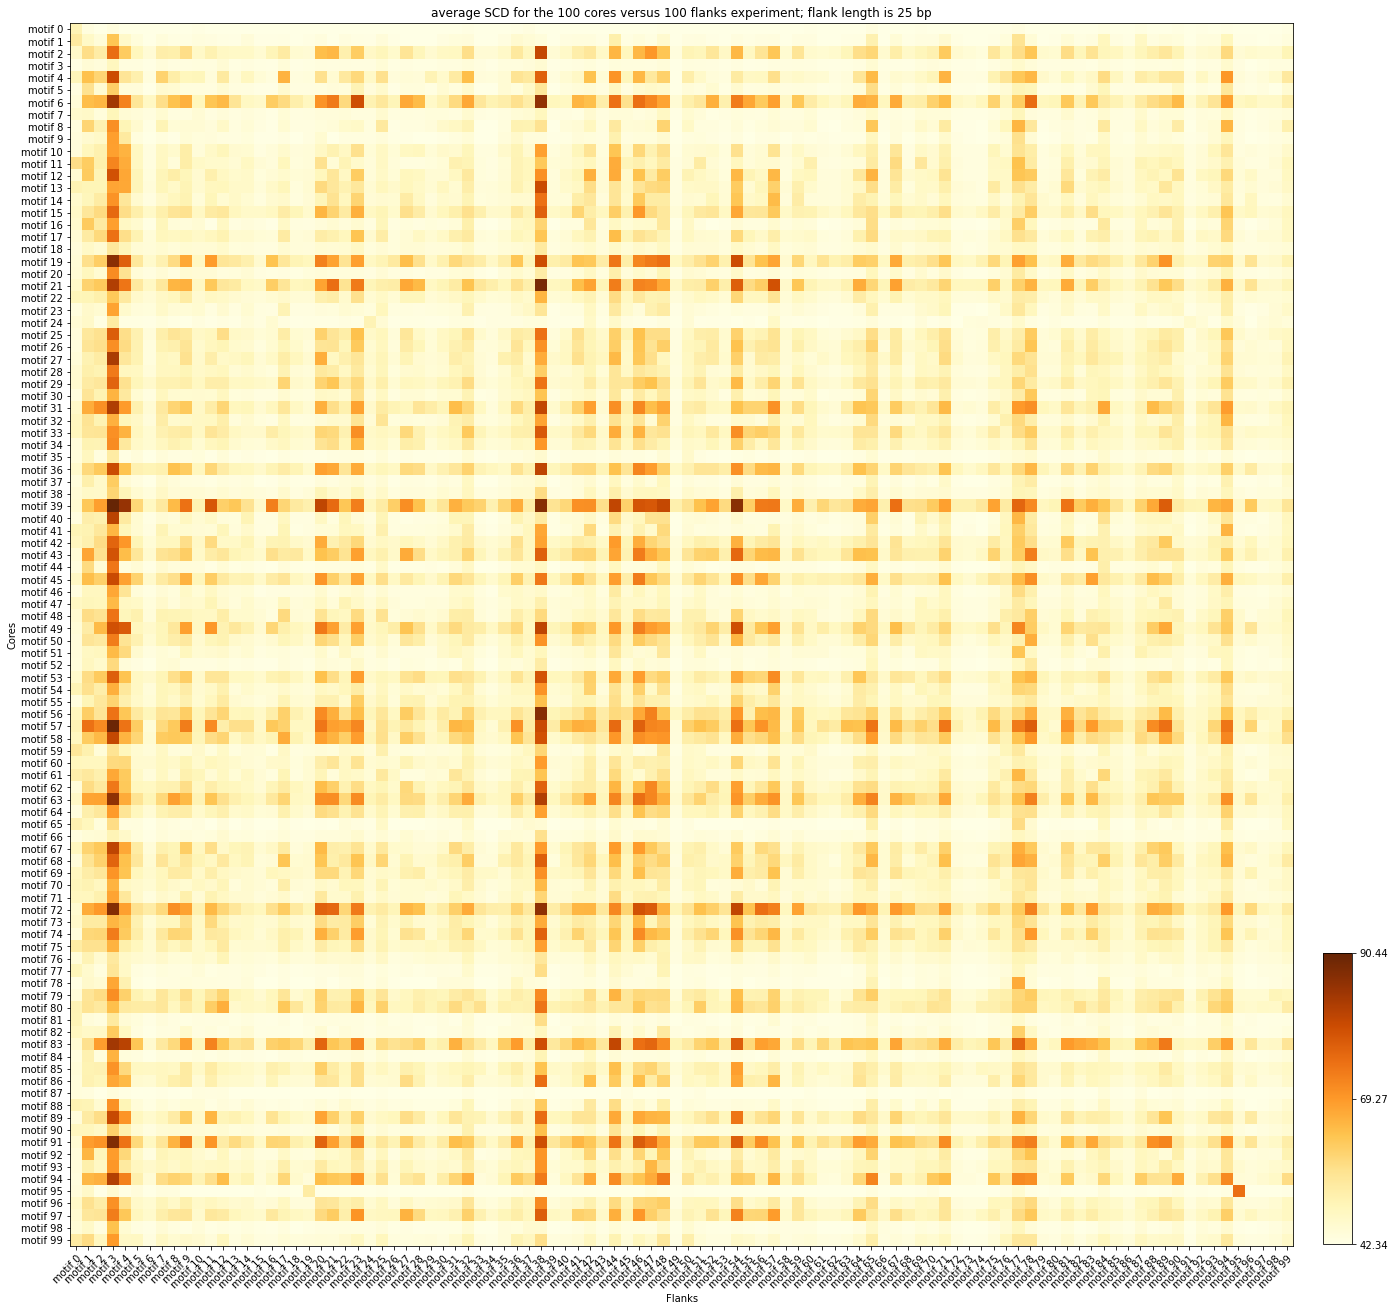

In [18]:
fig, ax = plt.subplots()
im = ax.imshow(summary_matrix, cmap="YlOrBr")

fig.set_figheight(22.5)
fig.set_figwidth(23)

ax.set_xticks(np.arange(len(all_names)), labels=all_names)
ax.set_yticks(np.arange(len(all_names)), labels=all_names)

ax.set_ylabel('Cores')
ax.set_xlabel('Flanks')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("average SCD for the 100 cores versus 100 flanks experiment; flank length is 25 bp")

cax = plt.axes([0.90, 0.126, 0.0175, 0.18])
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="YlOrBr"), cax=cax, ticks=[0, 0.5, 1])

cbar.ax.set_yticklabels([str(round(np.min(summary_matrix),2)), 
                         str(round((np.max(summary_matrix) - np.min(summary_matrix)/2),2)), 
                         str(round(np.max(summary_matrix),2))])

# plt.savefig("100vs100medium_p80_matplot.png")
plt.show()


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(summary_matrix)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
pca_values = pca.components_

In [ ]:
pca_values.shape

In [ ]:
plt.figure(figsize=(14,14))

x = pca_values[0,]
y = pca_values[1,]

plt.scatter(x, y)

for i in range(pca_values.shape[1]):
    plt.text(x[i]+0.001, y[i], all_names[i].split(' ')[1],horizontalalignment='left', color='black')

plt.xlabel("1st PC")
plt.ylabel("2nd PC")

# plt.savefig("100vs100_PCA.png")

plt.show()

In [ ]:
# average for each core
cores_ave = summary_matrix.mean(1)

In [ ]:
# average for each flank set
flanks_ave = summary_matrix.mean(0)

In [ ]:
# the more yellow, the higher value of the average SCD

In [ ]:
plt.figure(figsize=(14,14))

x = pca_values[0,]
y = pca_values[1,]

plt.scatter(x, y, c=cores_ave)

for i in range(pca_values.shape[1]):
    plt.text(x[i]+0.001, y[i], all_names[i].split(' ')[1],horizontalalignment='left', color='black')

plt.xlabel("1st PC")
plt.ylabel("2nd PC")

# plt.savefig("100vs100_PCA_ave_cores.png")

plt.show()

In [ ]:
plt.figure(figsize=(14,14))

x = pca_values[0,]
y = pca_values[1,]

plt.scatter(x, y, c=flanks_ave)

for i in range(pca_values.shape[1]):
    plt.text(x[i]+0.001, y[i], all_names[i].split(' ')[1],horizontalalignment='left', color='black')

plt.xlabel("1st PC")
plt.ylabel("2nd PC")

plt.savefig("100vs100_PCA_ave_flanks.png")

plt.show()